# Data Visualization with Pandas

* As an alternative to the `pyplot` or the object oriented interface, you can plot directly from `pandas` data structures
* Pandas [has its own interface](https://pandas.pydata.org/pandas-docs/stable/visualization.html#) to matplotlib tied directly to the `Series` and `Dataframe` data structures
* I find this to be the most useful mechanism for visualizing data

In [1]:
# import pandas so we can panda
import pandas as pd
import numpy as np
# import matplotlib and render inline
%matplotlib inline
import matplotlib.pyplot as plt

* Let's re-create the sin, cosine sub plot from earlier but from a Pandas dataframe

In [2]:
# create some random data
x = np.linspace(0, 10, 100)
# put that data into a dataframe
df = pd.DataFrame({"y":np.sin(x), "z":np.cos(x)}, index=x)
df.head()

,y,z
0.00000,0.000000,1.000000
0.10101,0.100838,0.994903
0.20202,0.200649,0.979663
0.30303,0.298414,0.954437
0.40404,0.393137,0.919480


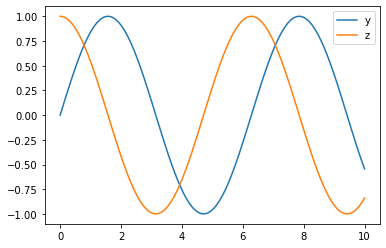

In [3]:
# Plot the data using the plot method
df.plot();

* Basically, you can add a `.plot()` to the end of any Pandas datastructure and it will make a best guess as to the best way to visualize it.

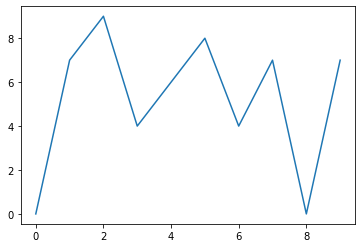

In [4]:
# Plot data in a Series with the plot method
pd.Series(np.random.randint(0,10,10)).plot();

* However, be careful calling `.plot()` all willy nilly since it doesn't always produce sensible results

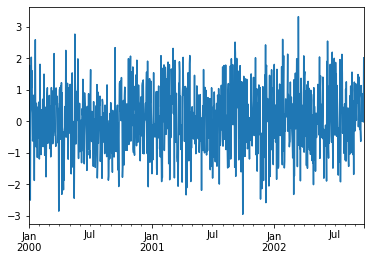

In [5]:
# create some random time series data and create a default plot
random_series = pd.Series(np.random.randn(1000), 
                          index=pd.date_range('1/1/2000', periods=1000))
random_series.plot();

* What is cool is you can often use the `.plot()` method after performing some computation on the data
    * because they return a Dataframe or Series
* For example, we can calculate the [cumulative sum](http://www.variation.com/cpa/help/hs108.htm) (the cumulative sum of differences between the values and the average)
    * Sloping up means above average, sloping down means below average

<AxesSubplot:>

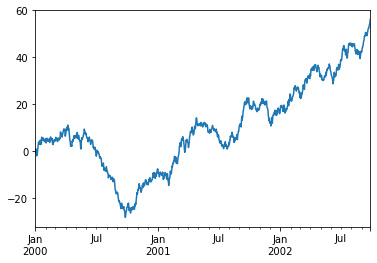

In [6]:
# Plot the cumulative sum of a Series
random_series.cumsum().plot()

* The `.plot()` trick also works with Dataframes

In [7]:
# create dataframe with four columns and create a default plot
df = pd.DataFrame(np.random.randn(1000, 4), index=random_series.index, columns=list('ABCD'))
df.head()

,A,B,C,D
2000-01-01,-1.182091,0.190041,-0.791440,0.009120
2000-01-02,1.735447,-0.201779,-0.696858,0.398115
2000-01-03,0.544678,-0.778236,-1.316963,0.034090
2000-01-04,-0.680592,-0.937448,-0.683336,-0.065156
2000-01-05,0.685733,-0.550971,-1.506928,0.106136


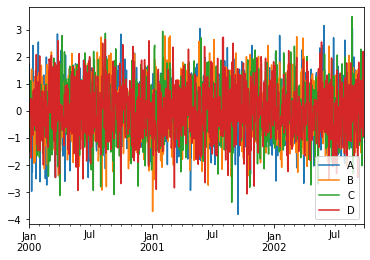

In [8]:
df.plot();

* Let's move the legend out of the way
* Because it is all matplotlib under the hood you can use multiple interfaces to affect changes

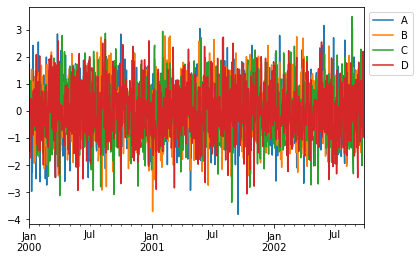

In [9]:
# use the pandas interface to generate the plot
df.plot();
# use the pyplot interface to manipulate the plot
plt.legend(bbox_to_anchor=(1,1));


* Messy! Let's try the cumulative sum trick and see if that looks any better

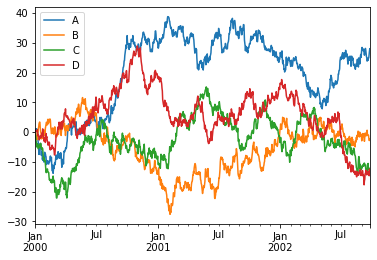

In [10]:
# Plot the cumulative sum of each column
df.cumsum().plot();

* With pandas you can specify the kind of visualization with the `kind` parameter to `plot()`
* The default isn't always what you want

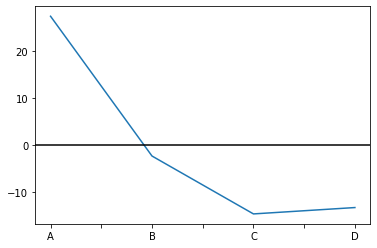

In [11]:
# plot the sum of the columns
df.sum().plot()
# draw a black horizontal line at zero
plt.axhline(0, color='k');

* This is a *bad* visualization, the line imply an ordered relationship between the four categories
* Let's use a bar chart instead

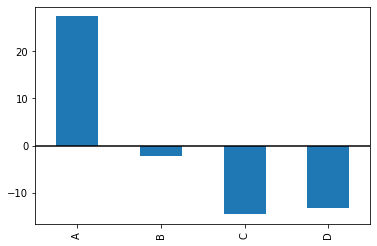

In [12]:
# plot the sum of the columns as bars
df.sum().plot(kind='bar')
# draw a black horizontal line
plt.axhline(0, color='k')

* Lets re-create that bar chart of animal counts

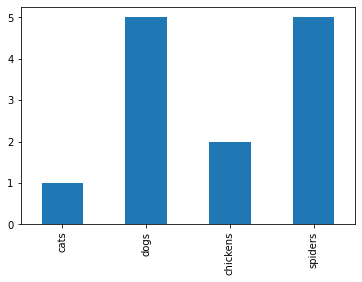

In [13]:
# Create a bar chart using the index as the category labels
pd.Series([1,5,2,5], index=["cats", "dogs", "chickens", "spiders"]).plot.bar();

* Almost got it, but the labels on the x axis are a bit wonky. 
* Let's look at the documentation and see if we can find a fix

#### Exercise

* Find the documentation for the `plot()` method of a Pandas `Series`
    * *HINT*: Try Googling
* What parameter will fix the x labels so they are easier to read?

In [14]:
animals = pd.Series([1,5,2,5], index=["cats", "dogs", "chickens", "spiders"])

# your code here

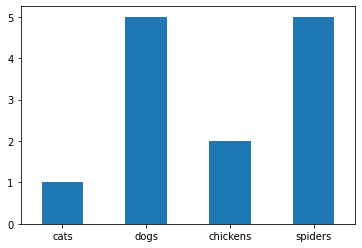

In [15]:
animals = pd.Series([1,5,2,5], index=["cats", "dogs", "chickens", "spiders"])

# using the pandas interface
animals.plot(kind="bar", rot=0);


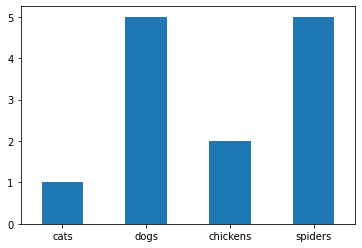

In [16]:
animals = pd.Series([1,5,2,5], index=["cats", "dogs", "chickens", "spiders"])

# using the pandas + pyplot interface
animals.plot(kind="bar");
plt.xticks(rotation=0);

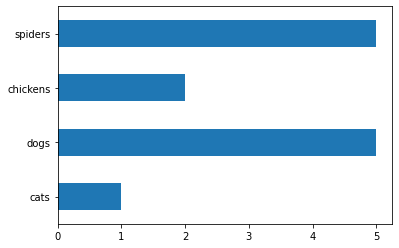

In [17]:
# A totally different solution
animals.plot.barh();

### Pandas Plot types

* Pandas provides a quick and easy interface to a bunch of different plot types
* You don't even have to load `matplotlib`
    * although you do need `%matplotlib inline`
* The secret to plotting is Googling, looking at other people's code, and trying things until it works
    * At least, that is how I do it


* What is nice about pandas/matplotlib integration is pandas will handle a lot of the boilerplate code for you
* Then you pass parameters to the `plot()` method to determine how the graph should look

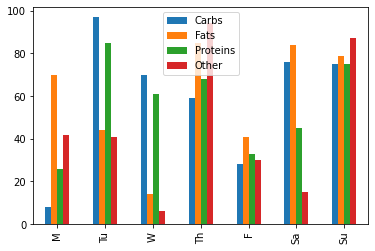

In [18]:
# create some random categorical data
df2 = pd.DataFrame(np.random.randint(1,100,size=(7,4)), 
                   columns=['Carbs', 'Fats', 'Proteins', 'Other'], 
                   index=["M","Tu","W","Th","F","Sa","Su",])

# Plot a bar chart
df2.plot(kind="bar");

* Bar charts can also be called directly using the `bar()` function 

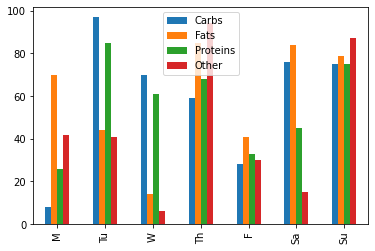

In [19]:
df2.plot.bar();

* There are a bunch of parameters for these methdos that let you tweak the vizualization
* For example, the `stacked` parameter stacks the categorical values so you can easily compare within and across categories

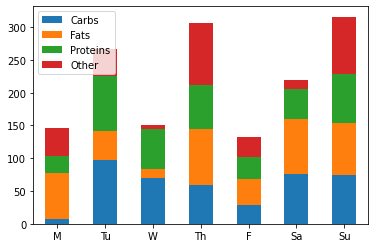

In [20]:
df2.plot.bar(stacked=True, rot=0);

## other plot types

* bar
* scatter
* line
* horizontal bar


#### Exercise

* Try experimenting with the other plot types
* Do they make sense for these data?



<AxesSubplot:>

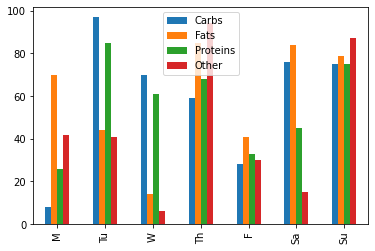

In [21]:
# move the cursor to the right of the period and hit tab
df2.plot(kind="bar")

In [22]:
# try another plot type
# move the cursor to the right of the period and hit tab
df2.plot.

SyntaxError: invalid syntax (<ipython-input-22-eb4a081a6745>, line 3)

### Formatting your plots 

* You can pass parameters to the `plot()` method
* Or you can set features through the `plt` interface


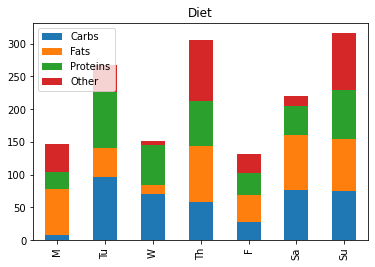

In [23]:
# Add a title with the title parameter
df2.plot.bar(stacked=True, title="Diet");

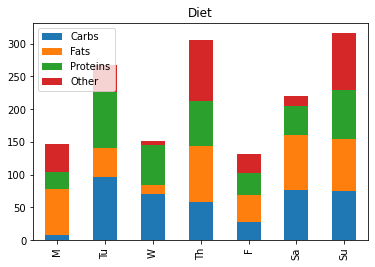

In [24]:
# Same thing as above, but through the pyplot interface
df2.plot.bar(stacked=True)
plt.title("Diet");

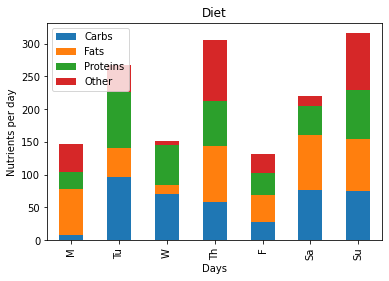

In [25]:
# some things are easier with pyplot, like tweaking x and y labels
df2.plot.bar(stacked=True)
plt.title("Diet")
plt.xlabel("Days")
plt.ylabel("Nutrients per day");

* Perhaps we want to make the y axis bigger, to give some headroom for the legend


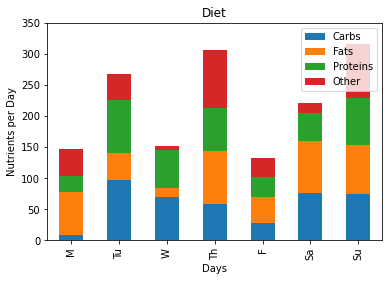

In [26]:
# modify the y axis to start at zero and go to 350
df2.plot(kind='bar', stacked=True, ylim=[0,350])
plt.title("Diet")
plt.xlabel("Days")
plt.ylabel("Nutrients per Day");

### Styles

* To help with the overall aesthetic of your plots you can set different styles
* Some look better than others

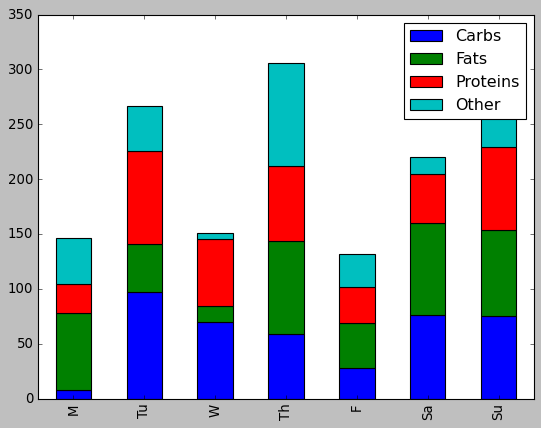

In [27]:
# This is what happens when scientists do visual design
plt.style.use('classic')
df2.plot.bar(stacked=True);

* There are a bunch of styles that ship with matplotlib

In [28]:
# look and see what styles are available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

#### Exercise

* Visualize `df2` using a couple different styles

In [29]:
# Put your code here
